# Продолжение лекции, другой датасет

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
poll_data = pd.read_csv('resources/mlcourse_open_first_survey_parsed.csv', index_col='id')

In [ ]:
poll_data.head()
#poll_data.info()

In [7]:
rename_dic = dict(
    zip(
        poll_data.columns,
        [
            "time",
            "intro",
            "jupyter",
            "expect",
            "sport",
            "personal",
            "math_level",
            "quest1",
            "quest2",
            "quest3",
            "fib_gen",
            "python",
            "github",
            "movie",
        ],
    )
)


In [10]:
poll_data.rename(columns=rename_dic, inplace=True)

In [14]:
poll_data.head(2)

,time,intro,jupyter,expect,sport,personal,math_level,quest1,quest2,quest3,fib_gen,python,github,movie
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN


In [31]:
#poll_data['jupyter'].value_counts()
jupyter_levels = poll_data['jupyter'].map({'Да': 1, 'Нет': 0}).fillna(2).astype('int64')

<Axes: xlabel='jupyter', ylabel='count'>

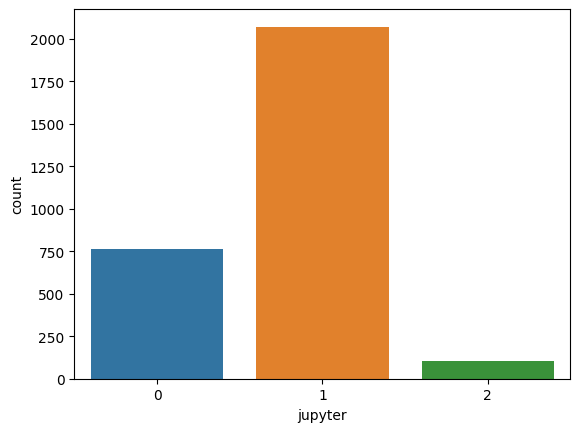

In [32]:
sns.countplot(x=jupyter_levels)

In [33]:
poll_data.columns

Index(['time', 'intro', 'jupyter', 'expect', 'sport', 'personal', 'math_level',
       'quest1', 'quest2', 'quest3', 'fib_gen', 'python', 'github', 'movie'],
      dtype='object')

In [35]:
poll_data['sport'].value_counts().head()

sport
Футбол       197
футбол       113
Баскетбол    113
Плавание      94
Хоккей        66
Name: count, dtype: int64

In [39]:
poll_data['quest3'].unique()

array([ 2., nan,  1.,  4.,  3.])

In [47]:
(poll_data['quest3'] == 2).dropna().sum() / poll_data['quest3'][~poll_data['quest3'].isna()].shape[0]

0.9244036697247706

In [59]:
all_words = np.concatenate(
poll_data['intro'].apply(lambda s: s.strip().split()).values)

In [57]:
len(all_words)

8294

In [63]:
#pd.Series(list(all_words)).value_counts()
#%pip install nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\u2n_099\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [68]:
len(stopwords.words('russian'))

151

In [70]:
words_series = pd.Series(list(all_words))
words_series[~words_series.isin(stopwords.words('russian'))].value_counts().head(10)

Студент     279
Работаю     201
курса       187
данных      178
Data        173
Я           166
работаю     157
data        130
машинным    123
ML          122
Name: count, dtype: int64